In [400]:
# Step 2 Importint Libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pickle, json

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import qqplot
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import shapiro, kstest, norm
from statsmodels.stats.diagnostic import normal_ad

import config
import warnings
warnings.filterwarnings("ignore")

In [401]:
# Step 3 Collecting Data
path = os.path.join(os.getcwd() + "\\" + config.CSV_FILE)
df = pd.read_csv(path, usecols = ['age', 'gender', 'bmi', 'children', 'discount_eligibility', 'region', 'premium'])
df.head()

,age,gender,bmi,children,discount_eligibility,region,premium
0,19,female,27.9,0,yes,southwest,168.8492
1,18,male,33.8,1,no,southeast,17.2555
2,28,male,33.0,3,no,southeast,44.4946
3,33,male,22.7,0,no,northwest,439.6894
4,32,male,28.9,0,no,northwest,77.3372


In [402]:
# Step 4 Performing EDA
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   1338 non-null   int64  
 1   gender                1338 non-null   object 
 2   bmi                   1338 non-null   float64
 3   children              1338 non-null   int64  
 4   discount_eligibility  1338 non-null   object 
 5   region                1338 non-null   object 
 6   premium               1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [403]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.0000,51.0000,64.0000
bmi,1338.0,30.665471,6.098382,16.0000,26.30000,30.4000,34.7000,53.1000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.0000,2.0000,5.0000
premium,1338.0,262.874685,292.532178,11.2187,87.35425,174.9974,342.9089,1983.1064


In [404]:
# Checking Duplicates
if df.duplicated().any():
    print("The count of duplicates :",(df.duplicated().sum()))
    print(df[df.duplicated()])


The count of duplicates : 1
     age gender   bmi  children discount_eligibility     region  premium
581   19   male  30.6         0                   no  northwest  16.3956


In [405]:
# There is only 1 record which is duplicated, hence there happens to be no need to drop it as impact is really less.

In [406]:
# Univariate Analysis on Numercial columns


<Axes: xlabel='age', ylabel='Count'>

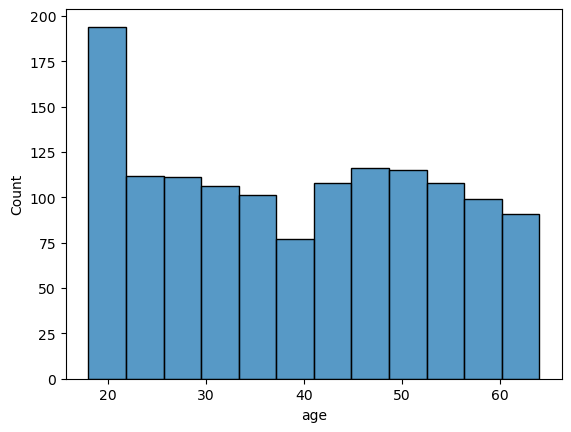

In [407]:
#. 1. Age
sns.histplot(df["age"])

<Axes: xlabel='age', ylabel='Density'>

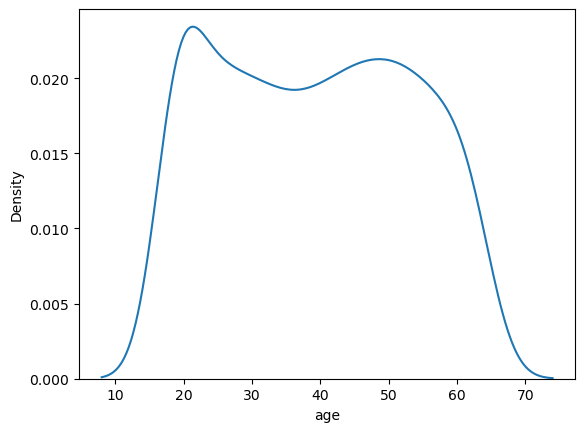

In [408]:
sns.kdeplot(df["age"])

<Axes: xlabel='age'>

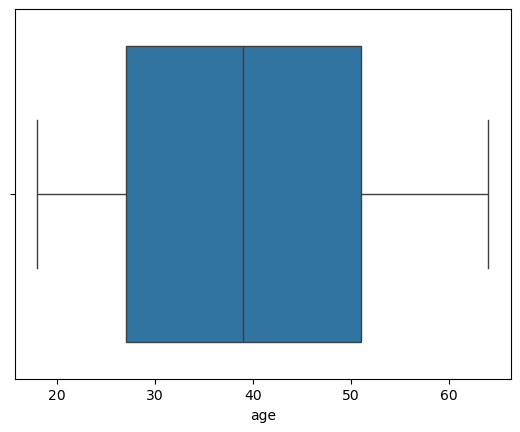

In [409]:
sns.boxplot(x = df["age"])

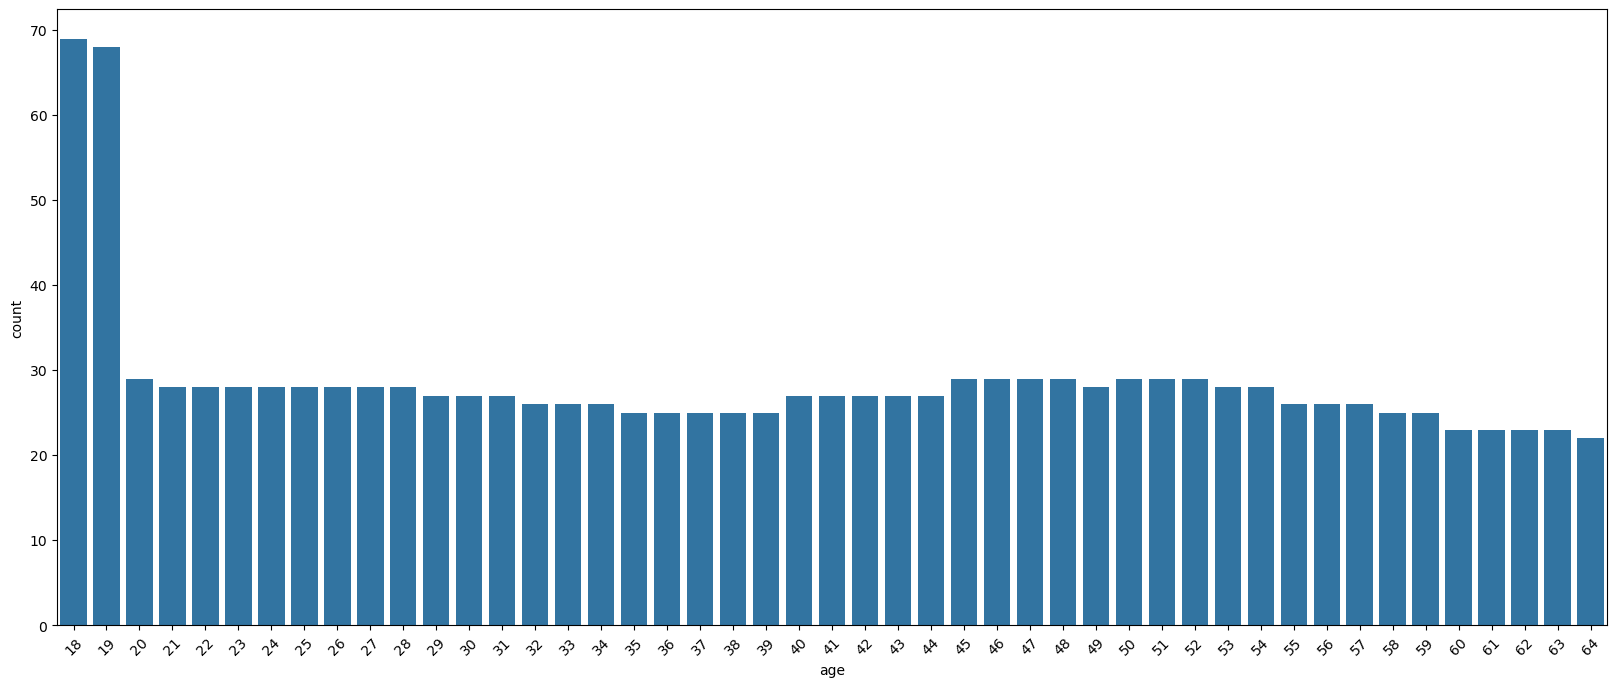

In [410]:
plt.figure(figsize=(20,8))
sns.barplot(df["age"].value_counts())
plt.xticks(rotation = 45)
plt.show()

In [411]:
# 2. Gender


In [412]:
df["gender"].value_counts()

gender
male      676
female    662
Name: count, dtype: int64

<Axes: ylabel='gender'>

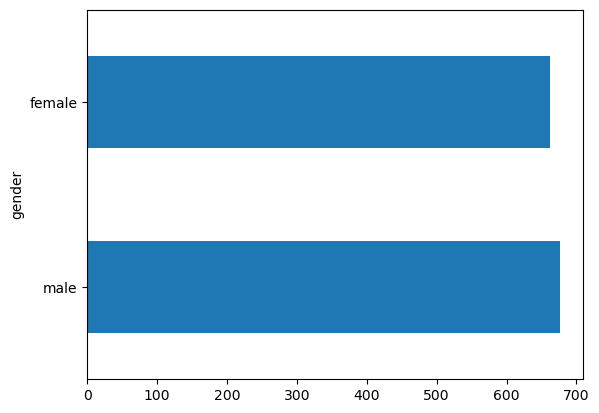

In [413]:
df["gender"].value_counts().plot(kind = "barh")

In [414]:
# The count of males and females is balanced

<Axes: >

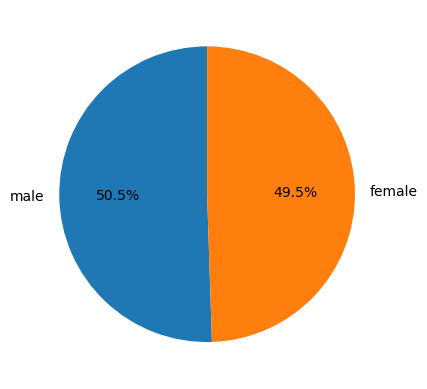

In [415]:
df["gender"].value_counts().plot(
    kind="pie",
    autopct="%1.1f%%",   # shows percentage
    startangle=90,       # optional: start at top
    ylabel=""            # remove y-label for cleaner look
)

<Axes: xlabel='bmi', ylabel='Density'>

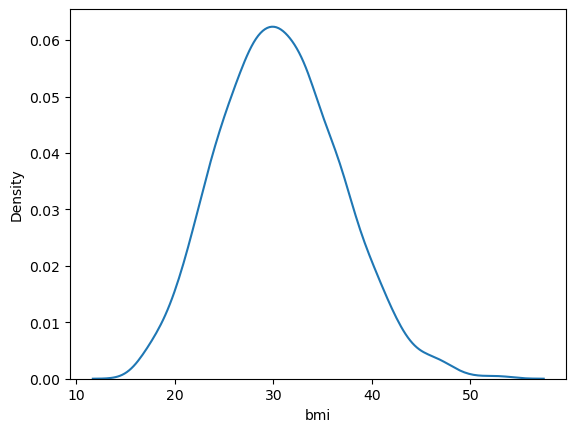

In [416]:
sns.kdeplot(df["bmi"])

<Axes: xlabel='bmi'>

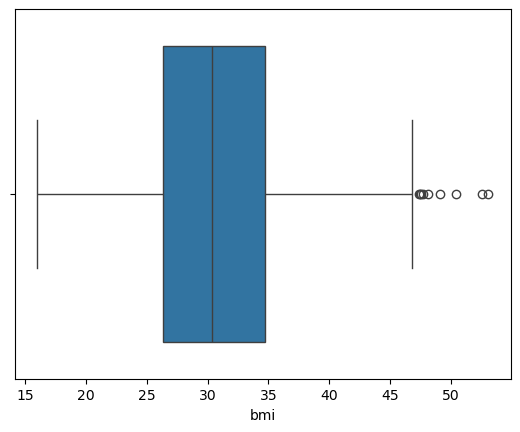

In [417]:
sns.boxplot(x= df["bmi"])

<Axes: xlabel='bmi', ylabel='Count'>

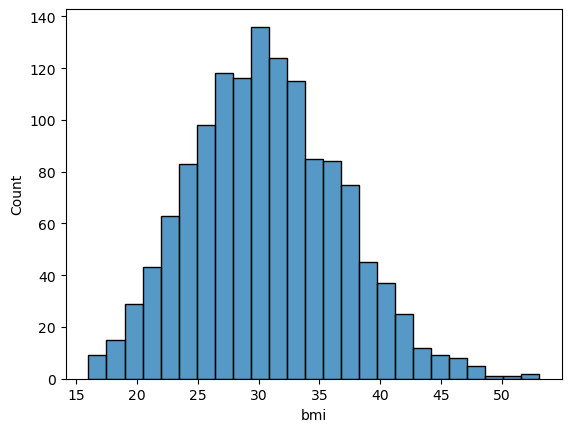

In [418]:
sns.histplot(df["bmi"])

<Axes: ylabel='children'>

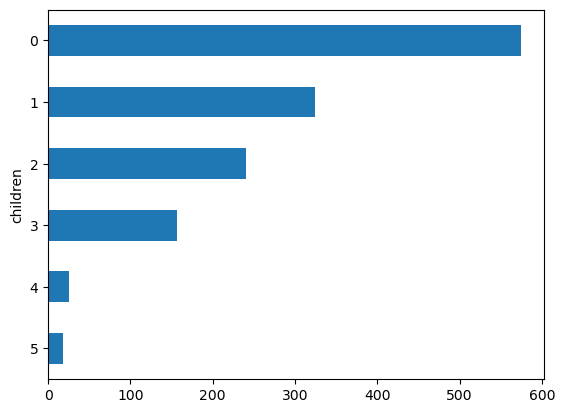

In [419]:
# Children

df["children"].value_counts().sort_values(ascending = True).plot(kind = "barh")

<Axes: xlabel='children'>

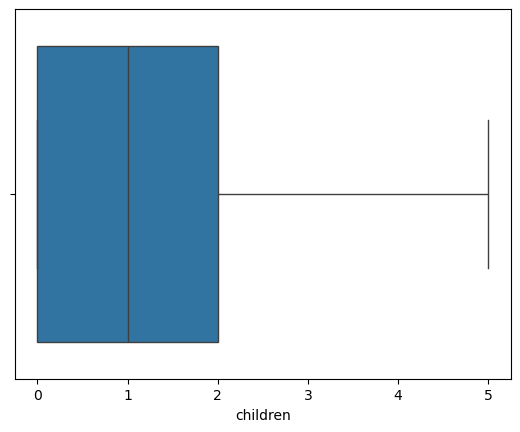

In [420]:
sns.boxplot(x = df["children"])

<Axes: xlabel='children', ylabel='Density'>

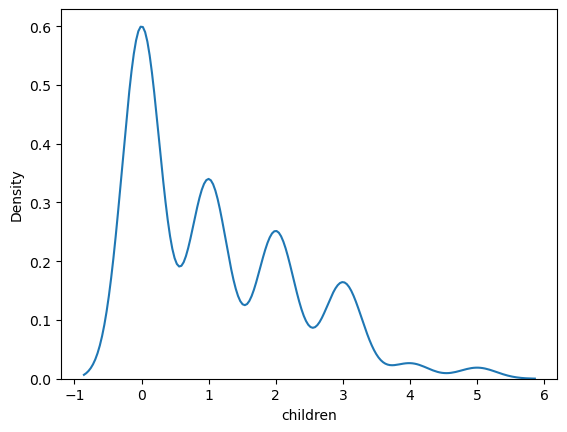

In [421]:
sns.kdeplot(df["children"])

In [422]:
df["bmi"].skew()

0.28459296016731195

In [423]:
df.sample()

,age,gender,bmi,children,discount_eligibility,region,premium
970,50,female,28.2,3,no,southeast,214.0528


In [424]:
# discount_eligibility


<Axes: ylabel='discount_eligibility'>

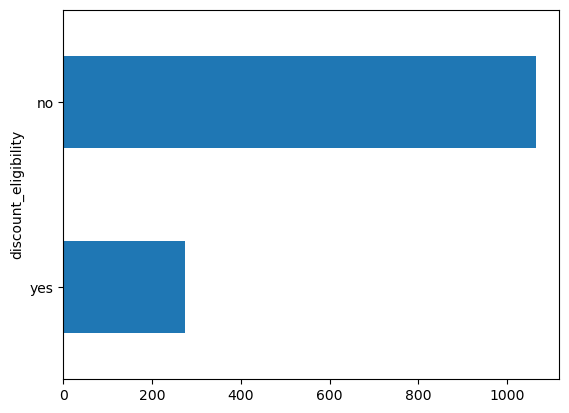

In [425]:

ab = df["discount_eligibility"].value_counts().sort_values(ascending = True)
ab.plot(kind = "barh")

<Axes: >

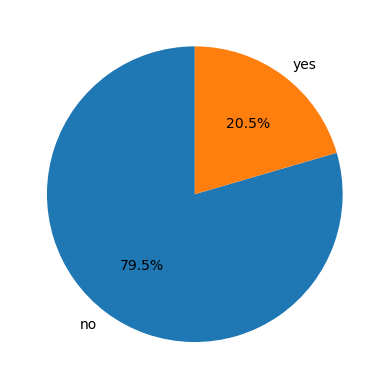

In [426]:
df["discount_eligibility"].value_counts().plot(
    kind="pie",
    autopct="%1.1f%%",   # shows percentage
    startangle=90,       # optional: start at top
    ylabel=""            # remove y-label for cleaner look
)

In [427]:
# region

<Axes: ylabel='region'>

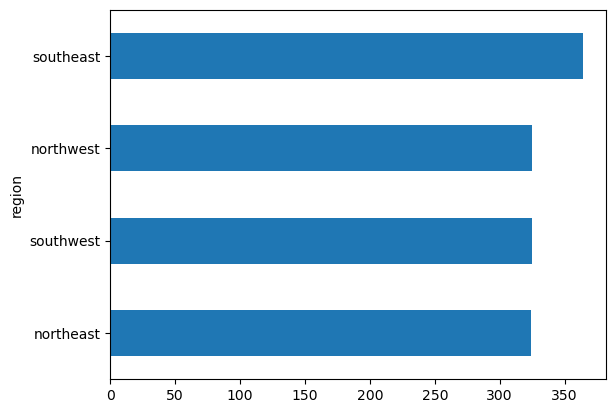

In [428]:

ab = df["region"].value_counts().sort_values(ascending = True)
ab.plot(kind = "barh")

<Axes: >

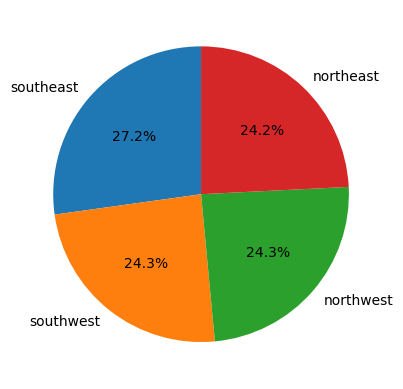

In [429]:
df["region"].value_counts().plot(
    kind="pie",
    autopct="%1.1f%%",   # shows percentage
    startangle=90,       # optional: start at top
    ylabel=""            # remove y-label for cleaner look
)

In [430]:
# Bivariate Analysis

In [431]:
df.columns

Index(['age', 'gender', 'bmi', 'children', 'discount_eligibility', 'region',
       'premium'],
      dtype='object')

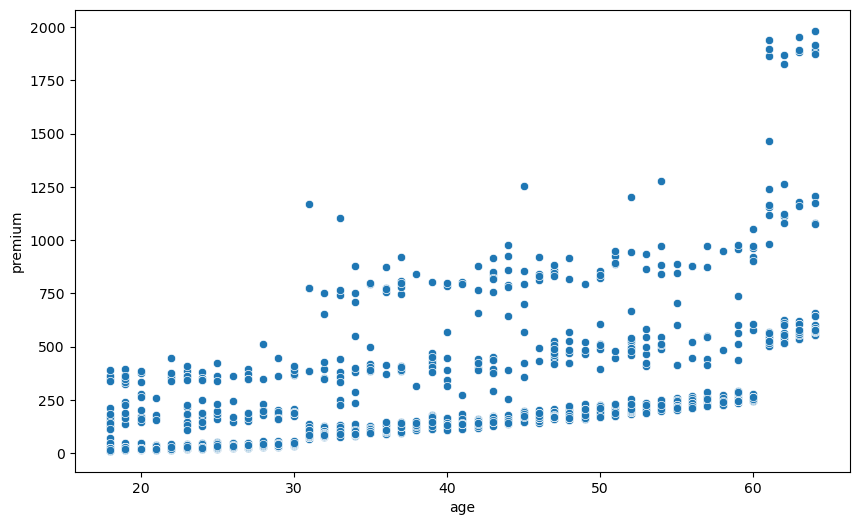

In [432]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x="age",
    y="premium",
   
    palette="coolwarm",   # or "viridis", "Set2", "Spectral", etc.
)
plt.show()

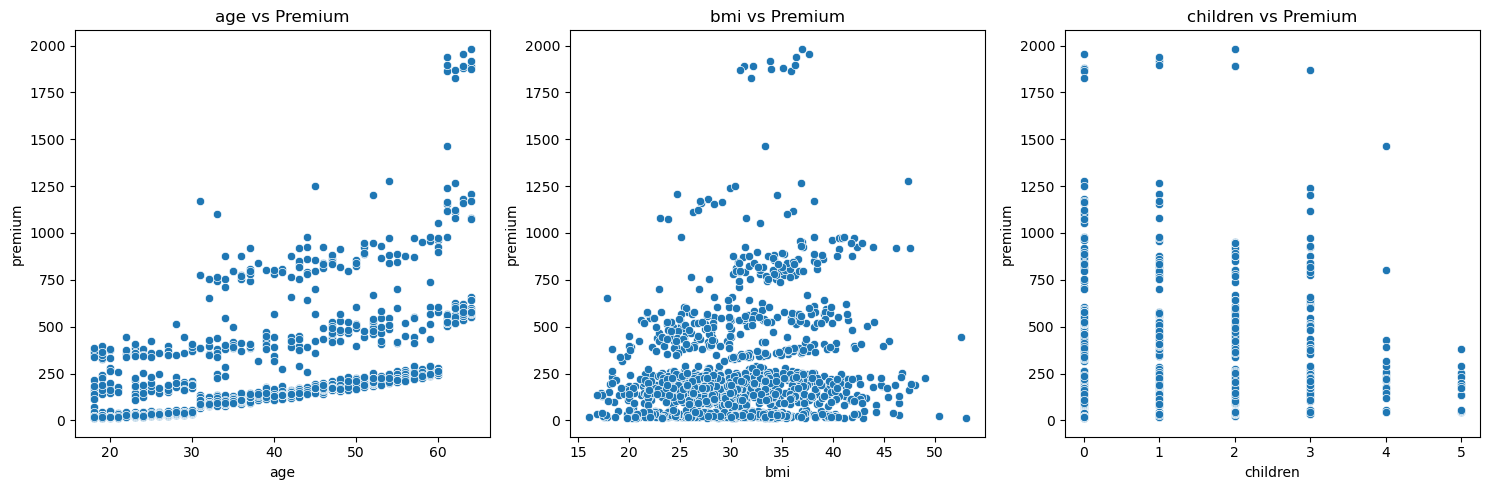

In [433]:
# Checking for Linearity assumption


features = ["age", "bmi", "children"]
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

for ax, column in zip(axes, features):
    sns.scatterplot(data=df, x=column, y="premium", ax=ax)
    ax.set_title(f"{column} vs Premium")

plt.tight_layout()
plt.show()

# all three columns have linear relations with premium column


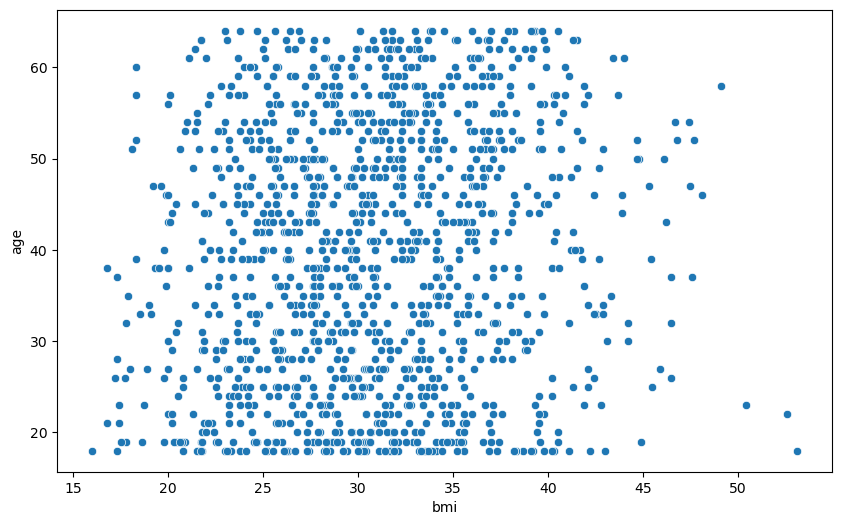

In [434]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x="bmi",
    y="age",
   
    palette="coolwarm",   # or "viridis", "Set2", "Spectral", etc.
)
plt.show()

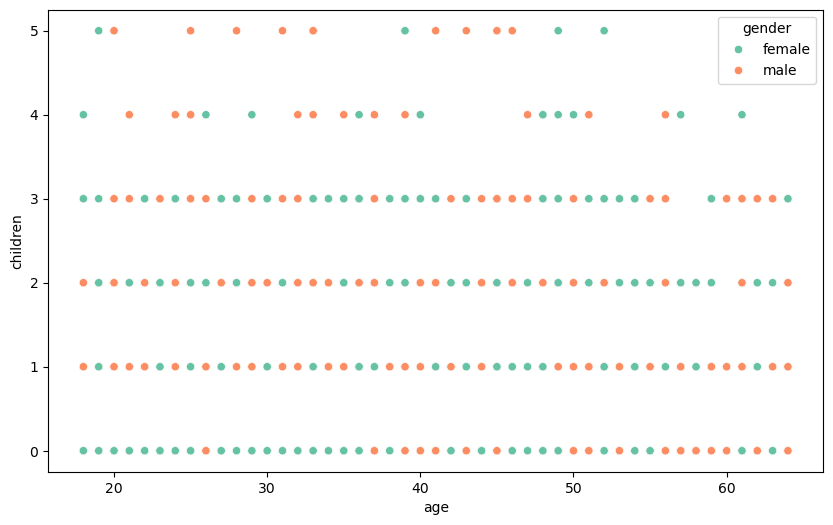

In [435]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x="age",
    y="children",
    hue = "gender",
   
    palette="Set2",   # or "viridis", "Set2", "Spectral", etc.
)
plt.show()

Text(0.5, 1.0, 'Children Vs Premium')

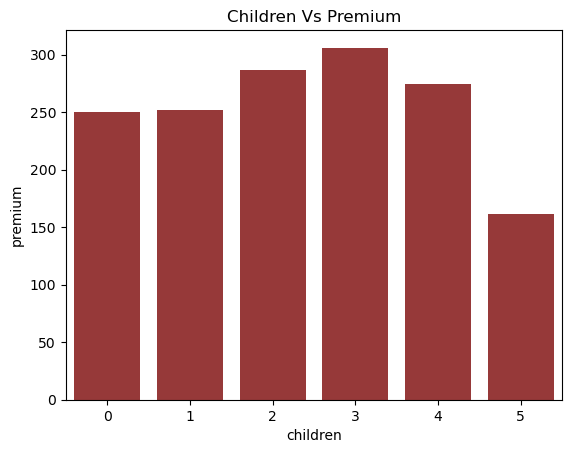

In [436]:
# 
sns.barplot(df, x = "children", y = "premium", ci=0, color = "brown")
plt.title("Children Vs Premium")

Text(0.5, 1.0, 'Region vs Premium')

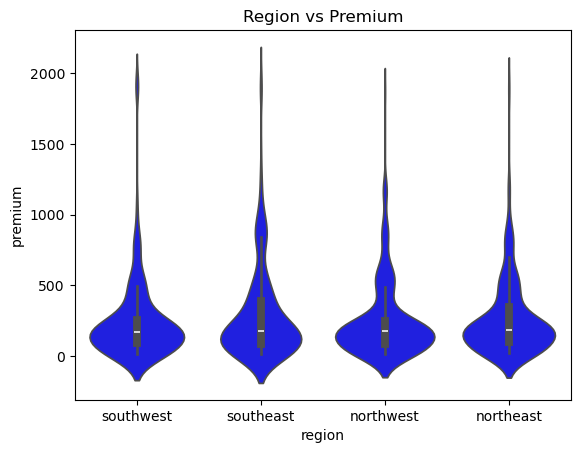

In [437]:
sns.violinplot(df, x = "region", y = "premium", color = "blue")
plt.title("Region vs Premium")

<Axes: xlabel='gender', ylabel='premium'>

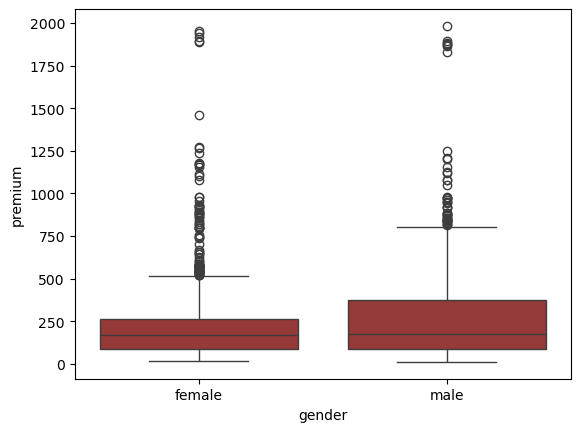

In [438]:
sns.boxplot(df, x = "gender", y = "premium", color = "brown")

In [439]:
df.columns

Index(['age', 'gender', 'bmi', 'children', 'discount_eligibility', 'region',
       'premium'],
      dtype='object')

In [440]:
cor = pd.DataFrame(df[['age', 'bmi', 'children', 'premium']].corr())


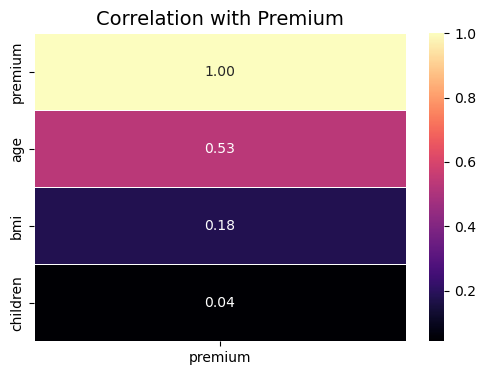

In [441]:
plt.figure(figsize=(6,4))
sns.heatmap(
    cor[["premium"]].sort_values(by="premium", ascending=False), 
    annot=True,
    cmap="magma",
    fmt=".2f",
    linewidths=0.5
)
plt.title("Correlation with Premium", fontsize=14)
plt.show()

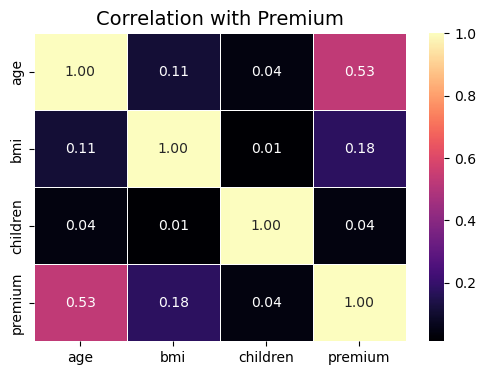

In [442]:
# Checking for assumption of Multicollinearity 
plt.figure(figsize=(6,4))
sns.heatmap(
    cor, 
    annot=True,
    cmap="magma",
    fmt=".2f",
    linewidths=0.5
)
plt.title("Correlation with Premium", fontsize=14)
plt.show()

In [443]:
# The independent features are not correlated to each other , meanwhile the dependent and independent features have linear relationships


In [444]:
df.sample()

,age,gender,bmi,children,discount_eligibility,region,premium
1246,45,female,25.7,3,no,southwest,182.036


In [445]:
# Feature Engineering
# Converting the binary columns to numerical
# Gender
df["gender"] = df["gender"].replace({"male":1, "female":0})
df["gender"]
df.sample()

,age,gender,bmi,children,discount_eligibility,region,premium
110,54,1,33.6,1,no,northwest,216.505


In [446]:
# discount_eligibilty
df["discount_eligibility"] = df["discount_eligibility"].replace({'no': 0, 'yes': 1})
df.sample()

,age,gender,bmi,children,discount_eligibility,region,premium
426,38,0,27.3,1,0,northeast,131.1014


In [447]:
# region
ohe = OneHotEncoder(drop=None,sparse_output = False)
oe = ohe.fit_transform(df[["region"]])
oe.shape

(1338, 4)

In [448]:
df1 = pd.DataFrame(
    data=oe, 
    columns=ohe.get_feature_names_out(['region']),  # feature names
    index=df.index                                  # keep original row alignment
)

In [449]:
df1


,region_northeast,region_northwest,region_southeast,region_southwest
0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0
...,...,...,...,...
1333,0.0,1.0,0.0,0.0
1334,1.0,0.0,0.0,0.0
1335,0.0,0.0,1.0,0.0
1336,0.0,0.0,0.0,1.0


In [450]:

df = pd.concat([df, df1], axis = 1)


In [451]:
df.drop("region", axis = 1, inplace = True)

In [452]:
df.sample()

,age,gender,bmi,children,discount_eligibility,premium,region_northeast,region_northwest,region_southeast,region_southwest
558,35,0,34.1,3,1,799.6686,0.0,1.0,0.0,0.0


In [453]:
# MinMaxScaler
d = df[["age","bmi","children"]]
m = MinMaxScaler()
m
scaled = m.fit_transform(d)
scaled

array([[0.02173913, 0.32075472, 0.        ],
       [0.        , 0.47978437, 0.2       ],
       [0.2173913 , 0.45822102, 0.6       ],
       ...,
       [0.        , 0.56334232, 0.        ],
       [0.06521739, 0.26415094, 0.        ],
       [0.93478261, 0.35309973, 0.        ]])

In [454]:
import copy
d1= pd.DataFrame(scaled, columns = d.columns)  # formed a df using the sacaled values  of age, bmi, children
d_scaled = copy.deepcopy(df)                      # creating a new df d_scaled and inserting the scaled values into d_scaled to form the complete dataset
d_scaled.sample()
d_scaled[["age","bmi","children"]] = d1[["age","bmi","children"]]
d_scaled.sample()


,age,gender,bmi,children,discount_eligibility,premium,region_northeast,region_northwest,region_southeast,region_southwest
1184,0.108696,0,0.336927,0.2,1,183.2824,0.0,0.0,1.0,0.0


In [455]:
d_scaled.head()

,age,gender,bmi,children,discount_eligibility,premium,region_northeast,region_northwest,region_southeast,region_southwest
0,0.021739,0,0.320755,0.0,1,168.8492,0.0,0.0,0.0,1.0
1,0.000000,1,0.479784,0.2,0,17.2555,0.0,0.0,1.0,0.0
2,0.217391,1,0.458221,0.6,0,44.4946,0.0,0.0,1.0,0.0
3,0.326087,1,0.180593,0.0,0,439.6894,0.0,1.0,0.0,0.0
4,0.304348,1,0.347709,0.0,0,77.3372,0.0,1.0,0.0,0.0


In [456]:
# Splitting the scaled data
X = d_scaled.drop("premium", axis = 1)
Y = d_scaled["premium"]
X.shape

(1338, 9)

In [457]:
# Checking Multicollinearity
vif = [(X.columns[i], variance_inflation_factor(X.to_numpy(), i)) for i in range(X.shape[1])]
for i in vif:
    if i[1] < 10:
        print(i)
# predictors with no multicollinearity

('age', 1.0168429439686248)
('gender', 1.008899770874051)
('bmi', 1.1066819689844145)
('children', 1.0040075926545466)
('discount_eligibility', 1.0120670743436315)
('region_northeast', 3.0310894278238667)
('region_northwest', 3.048854897340594)
('region_southeast', 4.260782743362635)
('region_southwest', 3.3166821688986263)


In [458]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.25, random_state = 14) # splitting data into train and test set
X_train.shape

(1003, 9)

In [459]:
X_test.shape

(335, 9)

In [460]:
# Training the model
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [461]:
# Evaluating the Training set
Y_pred_train = lr.predict(X_train)
Y_pred_train 
   

array([-14.  , -30.5 , -55.25, ...,  60.  , -97.25, 391.  ])

In [462]:
def train(Y_train, Y_pred_train):
    mse = mean_squared_error(Y_train, Y_pred_train)
    print("The Mean Squared Error is : ", mse)
    mae = mean_absolute_error(Y_train, Y_pred_train)
    print("The Mean Absolute Error is : ", mae)
    rmse = np.sqrt(mse)
    print("The Root Mean Squared Error is : ", rmse)
    r2 = r2_score(Y_train, Y_pred_train)
    print("The r2 score is : ", r2)
    adj_r2 = 1- ((1-r2)*(d_scaled.shape[0]-1)/(d_scaled.shape[0] - d_scaled.shape[1] -1))
    print("The adjusted r2 score is : ", adj_r2)
    return mse, mae, rmse , r2, adj_r2


In [463]:
train(Y_train, Y_pred_train)

The Mean Squared Error is :  30051.69005530257
The Mean Absolute Error is :  116.6916261216351
The Root Mean Squared Error is :  173.35423287391217
The r2 score is :  0.6700303666179034
The adjusted r2 score is :  0.6675437830958078


(30051.69005530257,
 116.6916261216351,
 173.35423287391217,
 0.6700303666179034,
 0.6675437830958078)

In [464]:
Y_test_pred = lr.predict(X_test)
Y_test_pred.shape
Y_test.shape

(335,)

In [465]:
def test(Y_test,Y_test_pred):
    mse = mean_squared_error(Y_test,Y_test_pred)
    print("The Mean Squared Error is : ", mse)
    mae = mean_absolute_error(Y_test,Y_test_pred)
    print("The Mean Absolute Error is : ", mae)
    rmse = np.sqrt(mse)
    print("The Root Mean Squared Error is : ", rmse)
    r2 = r2_score(Y_test,Y_test_pred)
    print("The r2 score is : ", r2)
    adj_r2 = 1- ((1-r2)*(d_scaled.shape[0]-1)/(d_scaled.shape[0] - d_scaled.shape[1] -1))
    print("The adjusted r2 score is : ", adj_r2)
    return mse, mae, rmse , r2, adj_r2


In [466]:
test(Y_test,Y_test_pred)

The Mean Squared Error is :  22844.936810921645
The Mean Absolute Error is :  111.72892746268657
The Root Mean Squared Error is :  151.14541610952563
The r2 score is :  0.667854122053561
The adjusted r2 score is :  0.6653511387985012


(22844.936810921645,
 111.72892746268657,
 151.14541610952563,
 0.667854122053561,
 0.6653511387985012)

### Since the mae is high, checking the metrics with unscaled data

In [468]:
df.sample()

,age,gender,bmi,children,discount_eligibility,premium,region_northeast,region_northwest,region_southeast,region_southwest
865,40,1,29.9,2,0,132.0072,0.0,0.0,0.0,1.0


In [469]:
x = df.drop("premium", axis = 1)
y = df["premium"]
x

,age,gender,bmi,children,discount_eligibility,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.9,0,1,0.0,0.0,0.0,1.0
1,18,1,33.8,1,0,0.0,0.0,1.0,0.0
2,28,1,33.0,3,0,0.0,0.0,1.0,0.0
3,33,1,22.7,0,0,0.0,1.0,0.0,0.0
4,32,1,28.9,0,0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,0.0,1.0,0.0,0.0
1334,18,0,31.9,0,0,1.0,0.0,0.0,0.0
1335,18,0,36.9,0,0,0.0,0.0,1.0,0.0
1336,21,0,25.8,0,0,0.0,0.0,0.0,1.0


In [470]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 12)
x_train.shape

(1070, 9)

In [471]:
# fititng the model
lr.fit(x_train, y_train)


LinearRegression()

In [472]:
# Evaluating the train set
y_ptrain = lr.predict(x_train)
train(y_train, y_ptrain)

The Mean Squared Error is :  28596.511387113398
The Mean Absolute Error is :  114.71776708236379
The Root Mean Squared Error is :  169.10503063810194
The r2 score is :  0.6735803219558709
The adjusted r2 score is :  0.671120490169555


(28596.511387113398,
 114.71776708236379,
 169.10503063810194,
 0.6735803219558709,
 0.671120490169555)

In [473]:
# Evaluating the test set
y_ptest = lr.predict(x_test)
test(y_test, y_ptest)

The Mean Squared Error is :  26535.09338241281
The Mean Absolute Error is :  114.02897239363624
The Root Mean Squared Error is :  162.89595876636355
The r2 score is :  0.6560356876926055
The adjusted r2 score is :  0.6534436431386688


(26535.09338241281,
 114.02897239363624,
 162.89595876636355,
 0.6560356876926055,
 0.6534436431386688)

The skew is  2.068090989423531


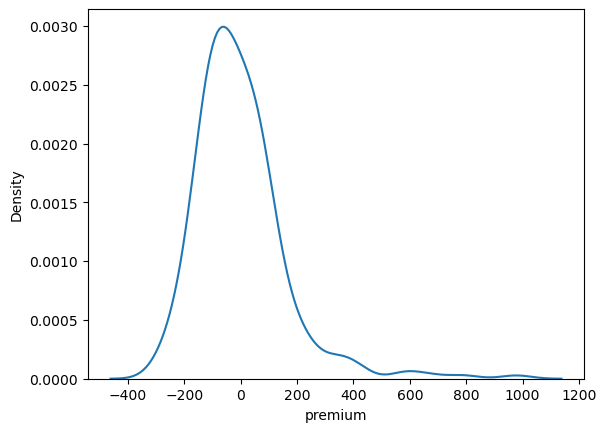

In [474]:
residual = y_test - y_ptest
residual
sns.kdeplot(residual)
print("The skew is ",residual.skew())
# Right skewed data mean is greater than median

### SINCE THE ACCURACY WITH LINEAR REGRESSION IS LOW AND ERROR IS HIGH, IMPLEMENTATION OF RIDGE & lASSO TO ARE BEING 
### IMPLEMENTED TO CHECK THE OUTPUT USING UNSCALED DATA


### RIDGE CV(using the unscaled dataset split as x_train,y_train)

In [477]:
# RIDGE CV(using the scaled dataset split as x_train,y_train)
ridge_cv = RidgeCV(alphas=[0.01, 0.1, 1, 10, 100], cv=5, scoring="r2")
r_cv = ridge_cv.fit(x_train, y_train)
# Evaluating train set
y_predtrcv = r_cv.predict(x_train)
print("The best alpha value:",ridge_cv.alpha_)
print("R2 on test set:", ridge_cv.score(x_test, y_test))
train(y_train, y_predtrcv)

The best alpha value: 1.0
R2 on test set: 0.6560549491887533
The Mean Squared Error is :  28597.553728835985
The Mean Absolute Error is :  114.6593404561668
The Root Mean Squared Error is :  169.10811254589765
The r2 score is :  0.6735684239713617
The adjusted r2 score is :  0.6711085025242733


(28597.553728835985,
 114.6593404561668,
 169.10811254589765,
 0.6735684239713617,
 0.6711085025242733)

In [478]:
# test evaluation 
y_pred_testrcv = ridge_cv.predict(x_test)
#y_pred_testrcv
test(y_test, y_pred_testrcv)

The Mean Squared Error is :  26533.6074561679
The Mean Absolute Error is :  114.01550681688887
The Root Mean Squared Error is :  162.89139773532517
The r2 score is :  0.6560549491887533
The adjusted r2 score is :  0.6534630497855035


(26533.6074561679,
 114.01550681688887,
 162.89139773532517,
 0.6560549491887533,
 0.6534630497855035)

### LASSO CV(using the unscaled dataset split as x_train,y_train)

In [480]:
# LASSO CV(using the unscaled dataset split as x_train,y_train)
lasso_cv = LassoCV(alphas=[0.01, 0.1, 1, 10, 100], cv=5)
l_cv = lasso_cv.fit(x_train, y_train)
print("The best alpha value:",lasso_cv.alpha_)
print("R2 on test set:", lasso_cv.score(x_test, y_test))

The best alpha value: 1.0
R2 on test set: 0.6546956342237134


In [481]:
# evaluating train set
y_pltrain = l_cv.predict(x_train)
train(y_train, y_pltrain)

The Mean Squared Error is :  28616.597089772516
The Mean Absolute Error is :  114.66056344530244
The Root Mean Squared Error is :  169.1644084604457
The r2 score is :  0.6733510503322617
The adjusted r2 score is :  0.6708894908019849


(28616.597089772516,
 114.66056344530244,
 169.1644084604457,
 0.6733510503322617,
 0.6708894908019849)

In [482]:
# evaluating test set
y_pltest= l_cv.predict(x_test)
test(y_test, y_pltest)

The Mean Squared Error is :  26638.4716767944
The Mean Absolute Error is :  114.18681004997802
The Root Mean Squared Error is :  163.21296418114096
The r2 score is :  0.6546956342237134
The adjusted r2 score is :  0.6520934913015107


(26638.4716767944,
 114.18681004997802,
 163.21296418114096,
 0.6546956342237134,
 0.6520934913015107)

In [483]:
# Comparing all the accuracies

In [484]:


comp1 = pd.DataFrame({
    "LinearReg": {
        "Train_MSE": 28609.59, "Train_MAE": 114.64, "Train_RMSE": 169.14, "Train_R2": 0.6734, "Train_Adj_R2": 0.6709,
        "Test_MSE":  26468.28, "Test_MAE": 113.84, "Test_RMSE": 162.69, "Test_R2": 0.6569, "Test_Adj_R2": 0.6543
    },
    "RidgeCV": {
        "Train_MSE": 28601.18, "Train_MAE": 114.25, "Train_RMSE": 169.11, "Train_R2": 0.6735, "Train_Adj_R2": 0.6710,
        "Test_MSE":  26490.50, "Test_MAE": 113.53, "Test_RMSE": 162.57, "Test_R2": 0.6566, "Test_Adj_R2": 0.6540
    },
    "LassoCV": {
        "Train_MSE": 28665.25, "Train_MAE": 113.64, "Train_RMSE": 169.30, "Train_R2": 0.6727, "Train_Adj_R2": 0.6703,
        "Test_MSE":  26605.64, "Test_MAE": 113.05, "Test_RMSE": 163.11, "Test_R2": 0.6551, "Test_Adj_R2": 0.6525
    }
}).T   # transpose so models are rows

print(comp1)


           Train_MSE  Train_MAE  Train_RMSE  Train_R2  Train_Adj_R2  Test_MSE  \
LinearReg   28609.59     114.64      169.14    0.6734        0.6709  26468.28   
RidgeCV     28601.18     114.25      169.11    0.6735        0.6710  26490.50   
LassoCV     28665.25     113.64      169.30    0.6727        0.6703  26605.64   

           Test_MAE  Test_RMSE  Test_R2  Test_Adj_R2  
LinearReg    113.84     162.69   0.6569       0.6543  
RidgeCV      113.53     162.57   0.6566       0.6540  
LassoCV      113.05     163.11   0.6551       0.6525  


In [485]:
# Here we conslude that RidgeCV happens to lead the score thru very less margin

<Axes: xlabel='premium'>

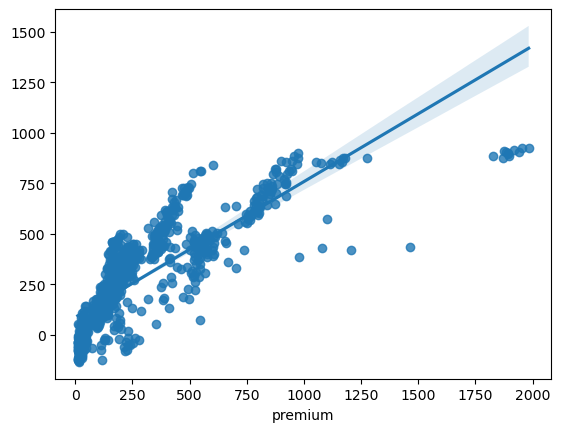

In [486]:
# Checking the best fit line on train set using predicted values of ridge cv
sns.regplot(x = y_train, y = y_predtrcv)


<Axes: xlabel='premium'>

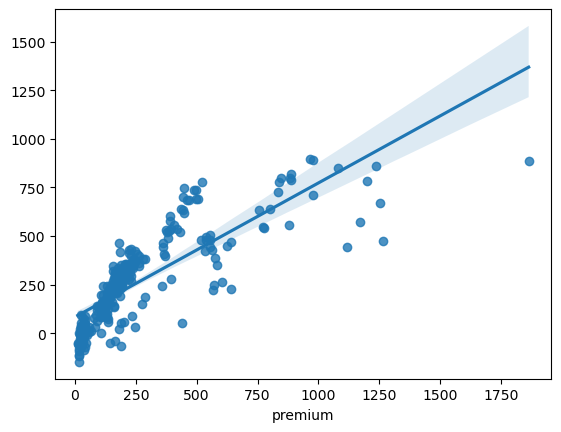

In [487]:
sns.regplot(x = y_test,y = y_pred_testrcv)

In [488]:
df2 = pd.DataFrame({"y_test":y_test, "y_test_pred":y_pred_testrcv})
df2.tail()

,y_test,y_test_pred
224,390.3108,604.820108
1245,56.1537,5.628446
1086,215.9270,345.133033
912,287.6542,379.254090
534,553.2448,502.739635


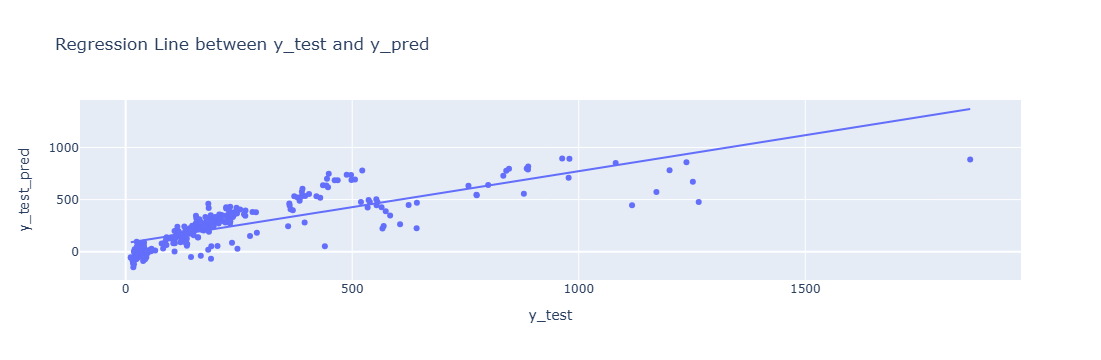

In [489]:
px.scatter(df2, x='y_test', y='y_test_pred', trendline='ols', title='Regression Line between y_test and y_pred')

In [490]:
# Checking the residual plot
residual_test = df2["y_test"]- df2["y_test_pred"]
residual_test

936     415.971995
728      25.712340
1307    -89.041582
924     -40.108991
137      77.022105
           ...    
224    -214.509308
1245     50.525254
1086   -129.206033
912     -91.599890
534      50.505165
Length: 268, dtype: float64

<Axes: ylabel='Density'>

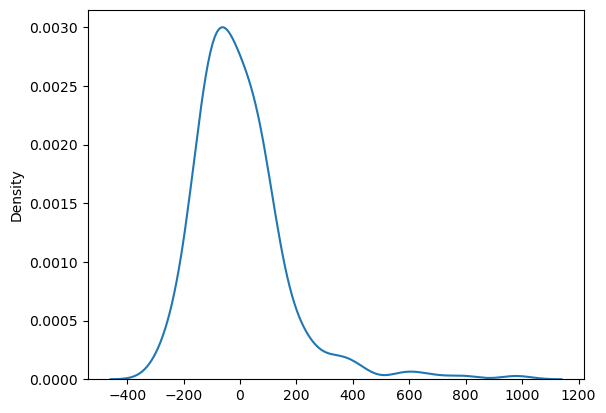

In [491]:
sns.kdeplot(residual_test)

In [492]:
# Checking for skewness for test set
print("The skew value is",residual_test.skew())
print("The mean is",residual_test.mean())
print("The median is",residual_test.median())
# The data is highly rightly skewed, and the mean is greater then the median

The skew value is 2.0821994139151996
The mean is -1.4408103737404627
The median is -29.868625739108026


The skew value is 2.4506300121590194
The mean is -0.27761264702419447
The median is -19.32194280189869


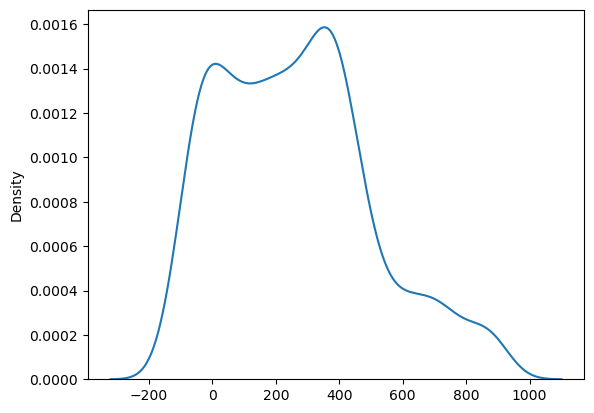

In [493]:
# checking for entire data set
y_pred = lr.predict(x)
sns.kdeplot(y_pred)
residual = y-y_pred
print("The skew value is",residual.skew())
print("The mean is",residual.mean())
print("The median is",residual.median())
# The data is highly rightly skewed, and the mean is greater then the median

In [494]:
# The residual does not follow normality

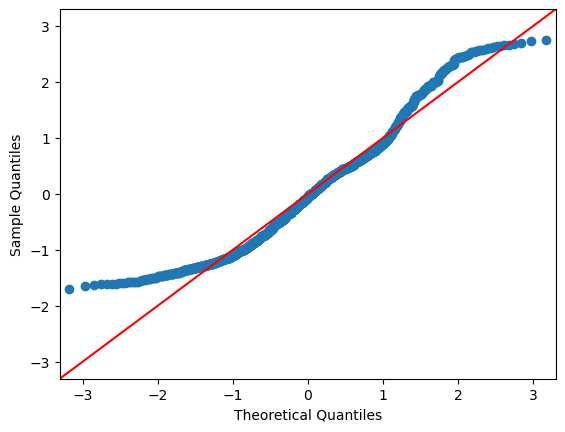

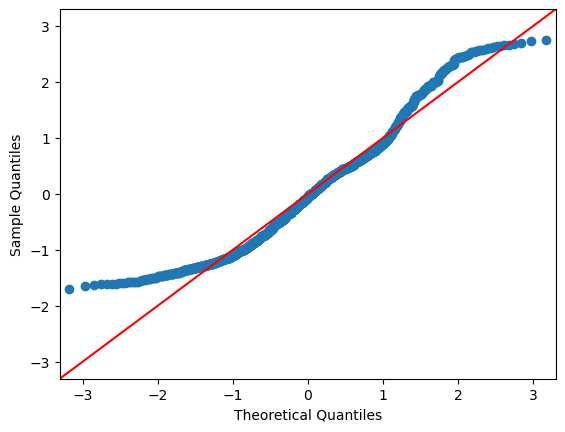

In [495]:
qqplot(y_pred, line = "45", fit = True)

In [496]:
# conducting the tests for residual normality

In [497]:
# Using Shapiro 
_,p_val = shapiro(residual)
if p_val >= 0.05:
    print(f"Null Hypothesis is true, Data is normally distributed and p_val is {p_val}")
else:
    print(f"Alternate Hypothesis is true, Data is not normally distributed and p_val is {p_val}")

Alternate Hypothesis is true, Data is not normally distributed and p_val is 1.1316744599116344e-35


In [498]:
# Using kstest 
_,p_val = kstest(residual, "norm")
if p_val >= 0.05:
    print(f"Null Hypothesis is true, Data is normally distributed and p_val is {p_val}")
else:
    print(f"Alternate Hypothesis is true, Data is not normally distributed and p_val is {p_val}")

Alternate Hypothesis is true, Data is not normally distributed and p_val is 0.0


In [499]:
# Using normal_ad test 
_,p_val = normal_ad(residual)
if p_val >= 0.05:
    print(f"Null Hypothesis is true, Data is normally distributed and p_val is {p_val}")
else:
    print(f"Alternate Hypothesis is true, Data is not normally distributed and p_val is {p_val}")

Alternate Hypothesis is true, Data is not normally distributed and p_val is 0.0


<Axes: xlabel='premium', ylabel='premium'>

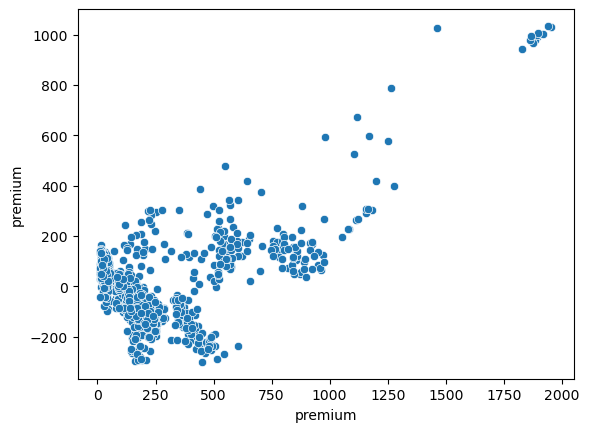

In [500]:
    # Checking for Homoscedasticity
sns.scatterplot(x = Y_train , y = residual)

In [501]:
# The model does not follow Homoscedasticity

In [502]:
# Creating a Pickle file for storing RidgeCV model
with open("RidgeCV_model.pkl","wb") as f:
    pickle.dump(r_cv,f)

In [503]:
# loading the RCV model to check proper functioning
with open("RidgeCV_model.pkl", "rb") as f:
    r_cv = pickle.load(f)
r_cv

RidgeCV(alphas=[0.01, 0.1, 1, 10, 100], cv=5, scoring='r2')

In [643]:
# Creating a Json file to save the replacement & OHE used to convert object columns to numerical
project_data = {"gender" : {"male":1, "female":0},
             "discount_eligibility":{'no': 0, 'yes': 1},
               "Columns":['age', 'gender', 'bmi', 'children', 'discount_eligibility',
        'region_northeast', 'region_northwest', 'region_southeast',
        'region_southwest']}
project_data

{'gender': {'male': 1, 'female': 0},
 'discount_eligibility': {'no': 0, 'yes': 1},
 'Columns': ['age',
  'gender',
  'bmi',
  'children',
  'discount_eligibility',
  'region_northeast',
  'region_northwest',
  'region_southeast',
  'region_southwest']}

In [645]:
import json
with open("project_data.json","w") as f:
    json.dump(project_data,f)

In [505]:
# 1st row of unscaled df
age = 19
gender='female'
bmi=27.9
children=0
discount_eligibility = 'yes'
region ='northwest'
 

In [506]:
x_train.head()

,age,gender,bmi,children,discount_eligibility,region_northeast,region_northwest,region_southeast,region_southwest
161,18,0,36.9,0,1,0.0,0.0,1.0,0.0
1032,30,0,27.9,0,0,1.0,0.0,0.0,0.0
151,48,1,29.7,0,0,0.0,0.0,1.0,0.0
759,18,1,38.2,0,1,0.0,0.0,1.0,0.0
362,19,0,21.7,0,1,0.0,0.0,0.0,1.0


In [635]:
# Testing single row input

In [649]:
# Encoding the categorical features

# Raw input
age = 31
gender = "female"
bmi = 25.7
children = 0
discount_eligibility = "no"
region = "southeast"

# Load scaler
#with open("minmaxscaler.pkl", "rb") as f:
    #scaler = pickle.load(f)

# Scale numeric features in order: age, bmi, children
#numeric_scaled = scaler.transform([[age, bmi, children]])

# Encode categorical
gender_enc = project_data["gender"][gender]
discount_enc = project_data["discount_eligibility"][discount_eligibility]

# Build test array
test_array = np.zeros(len(project_data["Columns"]))
test_array[0] = age  # age
test_array[1] = gender_enc
test_array[2] = bmi #  bmi
test_array[3] = children # scaled children
test_array[4] = discount_enc

# One-hot region
region_col = "region_" + region.lower()
columns = list(project_data["Columns"])
if region_col in columns:
    region_index = columns.index(region_col)
    test_array[region_index] = 1
else:
    raise ValueError(f"{region_col} not found in Columns!")

# Predict
predicted_value = r_cv.predict([test_array])[0]
print("Predicted value:", round(predicted_value, 4))


Predicted value: 50.3587


In [657]:
with open("RidgeCV_model.pkl", "rb") as f:
    model = pickle.load(f)
model.predict([test_array])[0]

50.358714904022804